In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
df = pd.read_csv(r"heart_failure_clinical_records_dataset.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

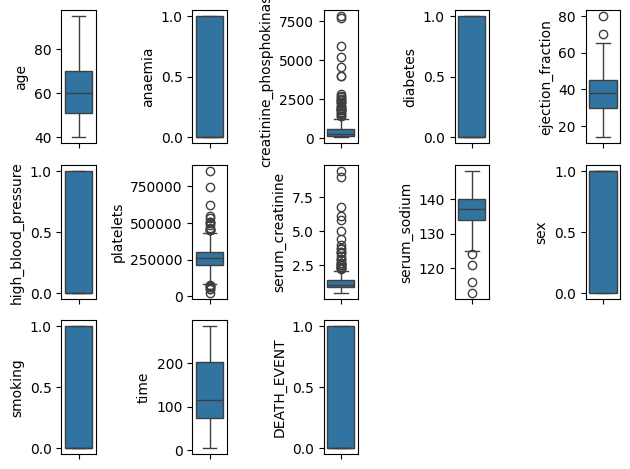

In [11]:
numerical_cols = df.select_dtypes(include="number").columns

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [12]:
col_outliers = ["creatinine_phosphokinase", "platelets", "serum_creatinine"]

Q1 = df[col_outliers].quantile(0.25)
Q3= df[col_outliers].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[col_outliers] = np.where(df[col_outliers] < lower_bound, lower_bound,
                           np.where(df[col_outliers] > upper_bound, upper_bound,
                                   df[col_outliers]))


ValueError: num must be an integer with 1 <= num <= 6, not 7

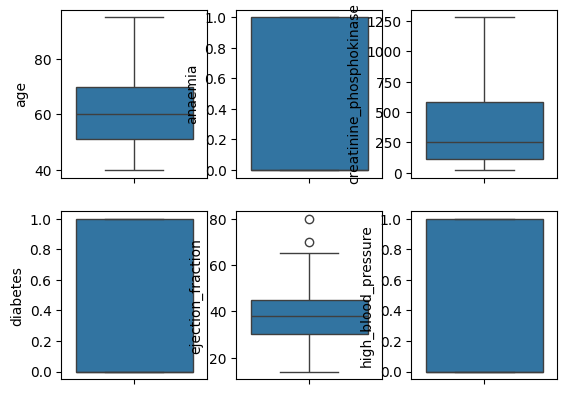

In [13]:
numerical_cols = df.select_dtypes(include="number").columns

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

<Axes: >

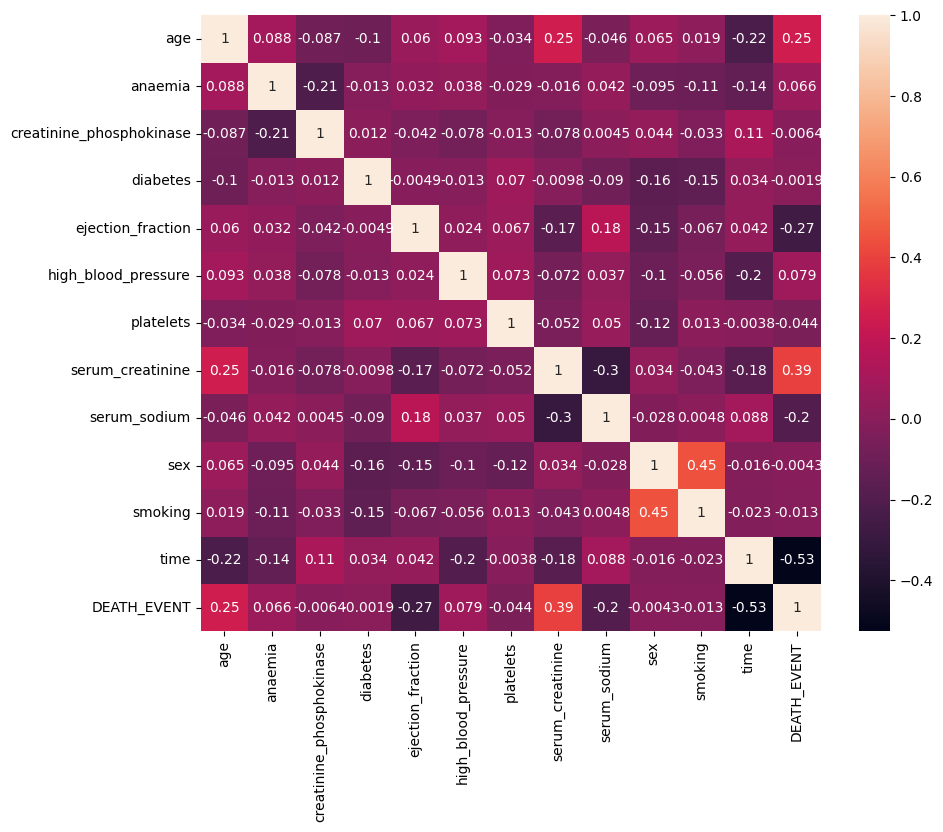

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

features = ["serum_creatinine", "time"]
x = df[features]
y = df["DEATH_EVENT"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

LINEAR KERNEL

In [30]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(x_train, y_train)

SVC(C=1, kernel='linear')

POLYNOMIAL KERNEL

In [31]:
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(x_train, y_train)

SVC(C=1, kernel='poly')

RBF KERNEL

In [32]:
svm_rbf = SVC(kernel='rbf', gamma='auto', C=1)
svm_rbf.fit(x_train, y_train)

SVC(C=1, gamma='auto')

In [33]:
!pip install mlxtend

You should consider upgrading via the 'C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


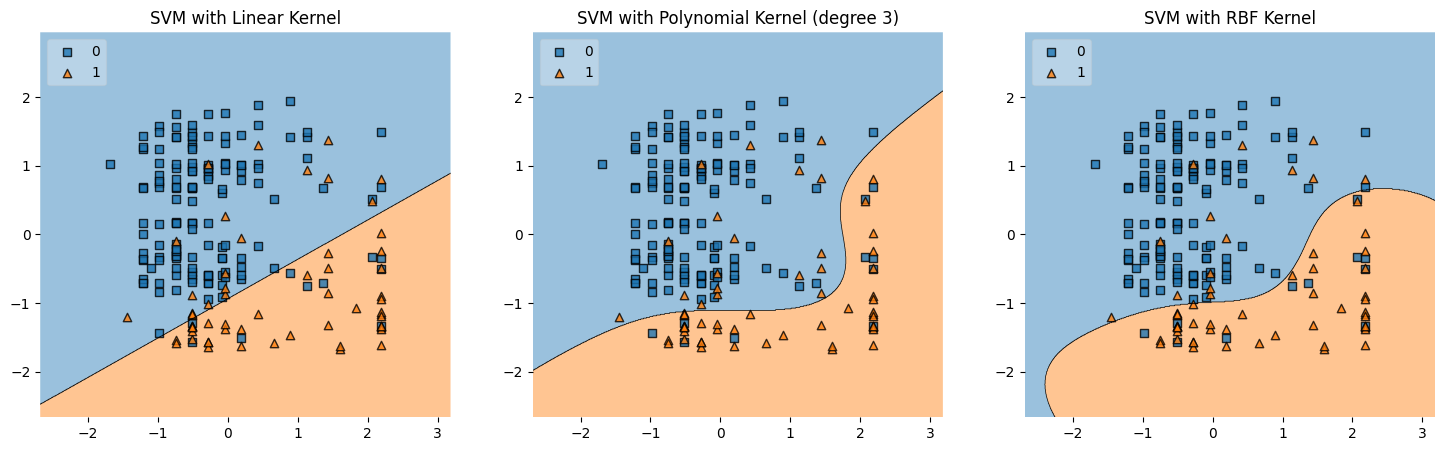

In [35]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(18, 5))

y_train_np = y_train.to_numpy()

plt.subplot(1, 3, 1)
plot_decision_regions(x_train, y_train_np, clf=svm_linear, legend=2)
plt.title("SVM with Linear Kernel")

plt.subplot(1, 3, 2)
plot_decision_regions(x_train, y_train_np, clf=svm_poly, legend=2)
plt.title("SVM with Polynomial Kernel (degree 3)")

plt.subplot(1, 3, 3)
plot_decision_regions(x_train, y_train_np, clf=svm_rbf, legend=2)
plt.title("SVM with RBF Kernel")

plt.show()
